## Using FAST AI library

A similar one can be found here: https://github.com/fastai/fastai_docs/blob/master/dev_nb/005b_planet.ipynb

In [2]:
from fastai import *          # Quick accesss to most common functionality
from fastai.vision import *   # Quick accesss to computer vision functionality

In [26]:
data_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [9]:
mean, std = (tensor([0.4668, 0.4251, 0.3783]),
 tensor([0.1821, 0.1763, 0.1727]))
norm, denorm = normalize_funcs(mean, std)

In [30]:
data = ImageDataBunch.from_csv(path='/media/yshi/4TB/openImage/train_crop/', suffix='.jpg', bs=64, test='../stage_1_test_images/copy/', ds_tfmfs=data_tfms, tfms=norm, sep=' ',valid_pct=0.2)

In [31]:
data

In [35]:
data.normalize()

In [41]:
x, y = next(iter(data.train_dl))
x,y = x.data,y.data
x.shape, y.shape

(torch.Size([64, 3, 256, 256]), torch.Size([64, 372]))

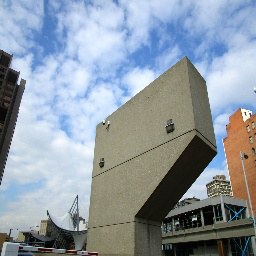

In [45]:
img,label = data.train_ds[0]
img

In [46]:
# transform_datasets(data.train_ds, data.valid_ds, tfms = (Image.resize(size=(256), Image.resize(256)))
img, _ = data.train_ds[12]

In [47]:
img.shape

torch.Size([3, 256, 256])

In [48]:
img.data.shape

torch.Size([3, 256, 256])

In [51]:
accuracy_thresh

<function fastai.metrics.accuracy_thresh(y_pred: torch.Tensor, y_true: torch.Tensor, thresh: float = 0.5, sigmoid: bool = True) -> <function NewType.<locals>.new_type at 0x7f1774613ae8>>

In [52]:
def fbeta(y_pred:Tensor, y_true:Tensor, thresh:float=0.5, beta:float=2, eps:float=1e-9, sigmoid:bool=True) -> Rank0Tensor:
    "Computes the f_beta between preds and targets"
    beta2 = beta**2
    if sigmoid: y_pred = y_pred.sigmoid()
    y_pred = (y_pred>thresh).float()
    y_true = y_true.float()
    TP = (y_pred*y_true).sum(dim=1)
    prec = TP/(y_pred.sum(dim=1)+eps)
    rec = TP/(y_true.sum(dim=1)+eps)
    res = (prec*rec)/(prec*beta2+rec+eps)*(1+beta2)
    return res.mean()


# def accuracy_thresh(y_pred:Tensor, y_true:Tensor, thresh:float=0.5, sigmoid:bool=True) -> Rank0Tensor:
#     if sigmoid: y_pred = y_pred.sigmoid()
#     return ((y_pred>thresh)==y_true.byte()).float().mean()


def f2_opt(y_pred, y_true, start=0.15, end=0.25, step=0.01):
    return max([fbeta(y_pred, y_true, th)
                for th in np.arange(start,end,step)])

metrics = [accuracy_thresh, f2_opt]

In [54]:

learn = ConvLearner(data, tvm.resnet34, metrics=metrics,  pretrained=False, loss_func=nn.BCEWithLogitsLoss())

learn.fit(30)

Total time: 2:03:27
epoch  train loss  valid loss  accuracy_thresh  f2_opt  
0      0.050323    0.050692    0.988296         0.199932  (06:56)
1      0.046020    0.047587    0.988161         0.247881  (04:01)
2      0.043834    0.054756    0.988621         0.291277  (04:01)
3      0.042032    2.747567    0.982503         0.309618  (04:02)
4      0.040752    0.060693    0.988774         0.347279  (04:01)
5      0.039670    0.040708    0.988937         0.330785  (04:01)
6      0.038258    0.039218    0.989005         0.375016  (04:01)
7      0.037290    0.038903    0.989039         0.362917  (04:01)
8      0.036149    0.037828    0.989165         0.391703  (04:01)
9      0.035034    0.038850    0.989154         0.397422  (04:00)
10     0.033818    0.037534    0.989226         0.405224  (04:01)
11     0.032763    0.037610    0.989280         0.400043  (04:01)
12     0.031584    0.036924    0.989343         0.422178  (04:01)
13     0.029665    0.038375    0.989343         0.407016  (04:00)

In [56]:
# learn.recorder.plot_lr(show_moms=True)
res = learn.get_preds(is_test=True)

Exception ignored in: <function Learner.__del__ at 0x7f1706e29d90>
Traceback (most recent call last):
Exception ignored in: <function Learner.__del__ at 0x7f1706e29d90>
Exception ignored in: <function Learner.__del__ at 0x7f1706e29d90>
Traceback (most recent call last):
  File "/home/yshi/fastai/fastai/basic_train.py", line 164, in __del__
Traceback (most recent call last):
  File "/home/yshi/fastai/fastai/basic_train.py", line 164, in __del__
    def __del__(self): del(self.model, self.data)
  File "/home/yshi/fastai/fastai/basic_train.py", line 164, in __del__
    def __del__(self): del(self.model, self.data)
Exception ignored in: <function Learner.__del__ at 0x7f1706e29d90>
AttributeError: model
AttributeError: model
Traceback (most recent call last):
    def __del__(self): del(self.model, self.data)
  File "/home/yshi/fastai/fastai/basic_train.py", line 164, in __del__
AttributeError: model
Exception ignored in: <function Learner.__del__ at 0x7f1706e29d90>
    def __del__(self): de

In [57]:
learn.save('res10')

In [66]:
res[0]

tensor([[-14.9915,  -9.7135, -11.2691,  ..., -12.8802, -16.9449, -10.7213],
        [ -8.6056,  -8.4447, -14.9010,  ..., -17.4555,  -8.5976, -19.0477],
        [ -8.4791, -12.5629, -10.6043,  ..., -10.7478,  -7.2508, -11.6786],
        ...,
        [ -9.7144, -10.8617, -10.2386,  ...,  -5.6994, -11.2787, -11.8621],
        [-19.2002, -15.0202, -14.8053,  ..., -15.6169, -18.7440, -18.2432],
        [-12.0105,  -9.1507, -13.2331,  ..., -17.7536, -12.1552, -18.4499]])

In [162]:
res_np[0].argmax(axis=0)

66

In [177]:
res_np = res[0].numpy()
res_clip = res_np.clip(min=-0)

In [182]:
new_list = []
for pic, row in enumerate(res_clip):
    tmp_list = []
    for i, n in enumerate(row):
        if n > 0:
            tmp_list.append(i)
    if tmp_list == []:
        tmp_list = [res_np[pic].argmax(axis=0)]
    new_list.append(tmp_list)

In [183]:
# Check how many of non-zeros

count = 0
for i, v in enumerate(res_np):
    if max(v) > -1:
        count += 1 
#         print (i, max(v), res_np.argmax(axis = 1)[i], image_ids[i], label_dict[class_dict[res_np.argmax(axis = 1)[i]]])

print (count)

28051


In [184]:
def _df_to_fns_labels(df:pd.DataFrame, fn_col:int=0, label_col:int=1,
                      label_delim:str=None, suffix:Optional[str]=None):
    "Get image file names and labels from `df`."
    if label_delim:
        df.iloc[:,label_col] = list(csv.reader(df.iloc[:,label_col], delimiter=label_delim))
    labels = df.iloc[:,label_col].values
    fnames = df.iloc[:,fn_col]
    if suffix: fnames = fnames.astype(str) + suffix
    return fnames, labels


df_labels = pd.read_csv('/media/yshi/4TB/openImage/train_crop//labels.csv')
fname, labels = _df_to_fns_labels(df=df_labels, label_delim = ' ')
classes = uniqueify(np.concatenate(labels)) 
class_dict = {}
for i, v in enumerate(classes):
    class_dict[i] = v


In [185]:
for i, v in enumerate(new_list):
    for idx in range(len(v)):
        new_list[i][idx] = class_dict[new_list[i][idx]]

In [186]:
# put the labels together
new_list = [' '.join(item) for item in new_list]

In [187]:
image_ids = [str(name)[51:-4] for name in get_image_files(Path('/media/yshi/4TB/openImage/stage_1_test_images/copy/'))]

In [188]:
image_idx = pd.DataFrame(image_ids)

In [189]:
image_idx.loc[:, 'labels'] = new_list

In [190]:
image_idx.columns = ['image_id', 'labels']

In [191]:
image_idx.to_csv('res-10thre.csv', index=None)

In [77]:
def _df_to_fns_labels(df:pd.DataFrame, fn_col:int=0, label_col:int=1,
                      label_delim:str=None, suffix:Optional[str]=None):
    "Get image file names and labels from `df`."
    if label_delim:
        df.iloc[:,label_col] = list(csv.reader(df.iloc[:,label_col], delimiter=label_delim))
    labels = df.iloc[:,label_col].values
    fnames = df.iloc[:,fn_col]
    if suffix: fnames = fnames.astype(str) + suffix
    return fnames, labels

In [96]:
label_descriptions = pd.read_csv('/home/yshi/Downloads/class-descriptions.csv')

In [97]:
label_descriptions =label_descriptions.set_index('label_code')

In [98]:
label_dict = label_descriptions.to_dict()

In [99]:
label_dict = label_dict['description']

In [100]:
label_dict

{'/m/0100nhbf': "Sprenger's tulip",
 '/m/0104x9kv': 'Vinegret',
 '/m/0105jzwx': 'Dabu-dabu',
 '/m/0105ld7g': 'Pistachio ice cream',
 '/m/0105lxy5': 'Woku',
 '/m/0105n86x': 'Pastila',
 '/m/0105ts35': 'Burasa',
 '/m/0108_09c': 'Summer snowflake',
 '/m/01_097': 'Airmail',
 '/m/010dmf': 'Isle of man tt',
 '/m/010jjr': 'Amusement park',
 '/m/010l12': 'Roller coaster',
 '/m/010lq47b': 'Witch hat',
 '/m/010ls_cv': 'Sandwich Cookies',
 '/m/01_0wf': 'Common Nighthawk',
 '/m/010xc': 'Aspartame',
 '/m/01127': 'Air conditioning',
 '/m/01_12b': 'Granny smith',
 '/m/0114n': 'Atari jaguar',
 '/m/01154': 'Atari lynx',
 '/m/011_6p': 'Kazoo',
 '/m/0117_25k': 'Saffron crocus',
 '/m/01172_8x': 'Pencil skirt',
 '/m/0117wzjg': 'Zenvo ST',
 '/m/0117z': 'Air show',
 '/m/0118b5n4': 'May day',
 '/m/0118ms9c': 'Reflex camera',
 '/m/0118n_9r': 'Water bottle',
 '/m/0118n_nl': 'Unleavened bread',
 '/m/0118q29r': 'Ides of march',
 '/m/01195jk4': 'Jean short',
 '/m/0119x1zy': 'Bun',
 '/m/0119x27p': 'Cocker spaniel',


In [256]:
#from old notebook -- get all the missing image_id. Kaggle bug -- https://www.kaggle.com/c/inclusive-images-challenge/discussion/68003. Stupid

for i in sample['image_id']:
    if i not in list(datapath['image_id']):
        print (i)

2f5a2f2b45482f575a4b513d
31546e6137786c386251733d
32594442746c52336b7a4d3d
32625367666e476950676f3d
3445784c70317276684c6f3d
36367574642b44304541383d
36646469306e70413072633d
37326a444b5541566467383d
37516663696c4a3646506f3d
43697572783031464f58303d
4377436d2b6f4d6234496f3d
45336738316e37754d2f553d
4755704e437954585466633d
495a4c62446a4f332b70493d
4a5a734f63574b61414d493d
4e456d3454704c4c2f416f3d
52497a49426d44326475773d
554557726555794b504f773d
5869697a694b5973346d413d
5a4b6c48757352382f35303d
616e4a337833722f68566f3d
6238714c504a49496d2b733d
62577046573778353679413d
6361636a7443646330346b3d
64637271534f38422f75453d
6466324d54417a433337733d
64676b33384b64387a55343d
646965317876584b61504d3d
65457a6c6b6b662b46556b3d
66347377704d7a35614b6b3d
674b4e594861312b4c64593d
674f6137354c2b32486a513d
67617838564f5a786769593d
6971617677317a63782f673d
6a36777149376a694531413d
6b51576e385462413931453d
6d5a6a345539475575486f3d
6d614239586266483763773d
6e3577614d384b736b6b493d
7436413551596c33682f633d
